In [1]:
#Importando a biblioteca pandas
import pandas as pd

In [2]:
#Leitura dos arquivos
df_aracaju = pd.read_excel('/content/data_sets/Aracaju.xlsx')
df_fortaleza = pd.read_excel('/content/data_sets/Fortaleza.xlsx')
df_natal = pd.read_excel('/content/data_sets/Natal.xlsx')
df_recife = pd.read_excel('/content/data_sets/Recife.xlsx')
df_salvador = pd.read_excel('/content/data_sets/Salvador.xlsx')

In [3]:
#Unindo todos os arquivos
df = pd.concat([df_aracaju, df_fortaleza, df_natal, df_recife, df_salvador])

In [4]:
#Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [5]:
#Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [6]:
#Exemplos aleatórios do dataframe
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
74,Natal,2019-03-10,303.00,854,3
143,Salvador,2019-01-02,41.18,1037,2
38,Natal,2018-02-25,828.00,852,4
115,Aracaju,2018-01-01,50.99,1522,10
123,Fortaleza,2019-03-02,20.22,981,6


In [7]:
#Verificando o tipo de dado das colunas
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [8]:
#Alterando o tipo de dado da coluna LojaID
df['LojaID'] = df['LojaID'].astype('object')

In [32]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [10]:
#Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [11]:
#Criando coluna de receita onde será o resultado da coluna Vendas x Qtde
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [12]:
df.head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08
5,Aracaju,2018-01-01,156.20,1522,1,156.20
6,Aracaju,2018-01-01,35.50,1522,2,71.00
7,Aracaju,2019-01-01,172.22,1522,6,1033.32
8,Aracaju,2019-01-01,12.16,1523,1,12.16
9,Aracaju,2019-01-01,149.36,1523,3,448.08


In [13]:
#Valor máximo da receita obtida
df['Receita'].max()

3544.0

In [14]:
#Valor Mínimo da receita obtida
df['Receita'].min()

3.34

In [15]:
#Top 5 lojas com maiores receitas
df.nlargest(5, ['Receita'])

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


In [16]:
#Top 5 lojas com menores receitas
df.nsmallest(5,['Receita'])

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


In [17]:
#Agrupamento de receita total por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [18]:
#Ordenando o dataframe pela coluna Receita
df.sort_values('Receita', ascending=False)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.00,853,4,3544.00
55,Natal,2019-01-08,859.00,854,4,3436.00
51,Natal,2018-01-21,859.00,852,4,3436.00
30,Natal,2018-10-02,856.00,853,4,3424.00
41,Natal,2018-05-20,835.00,852,4,3340.00
...,...,...,...,...,...,...
95,Natal,2019-01-02,5.13,1035,1,5.13
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
65,Recife,2019-01-01,4.01,981,1,4.01


# Trabalhando com Datas

In [31]:
#Agrupamento por ano
df.groupby(df["Data"].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [35]:
#Criando uma nova coluna com o ano
df['Ano_Venda'] = df['Data'].dt.year

In [44]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda
1,Recife,2019-01-01,11.44,983,1,11.44,2019
33,Aracaju,2018-01-01,35.09,1523,4,140.36,2018
226,Natal,2019-01-02,38.32,1035,2,76.64,2019
9,Aracaju,2019-01-01,149.36,1523,3,448.08,2019
84,Recife,2019-01-01,36.41,980,6,218.46,2019


In [45]:
#Extraindo o mês e o dia
df['Mes_Venda'], df['Dia_Venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [53]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2019,2,11
51,Natal,2018-01-21,859.00,852,4,3436.00,2018,1,21
116,Aracaju,2018-01-01,48.44,1522,4,193.76,2018,1,1
28,Aracaju,2018-01-01,114.93,1520,5,574.65,2018,1,1
58,Natal,2018-12-23,272.00,853,3,816.00,2018,12,23


In [54]:
#Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [55]:
#Retornando a data mais atual
df['Data'].max()

Timestamp('2019-04-05 00:00:00')

In [67]:
#Calculando a diferença de dias
df['Diferenca_Dias'] = df['Data'] - df['Data'].min()

In [68]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias
65,Aracaju,2018-01-01,145.54,1522,3,436.62,2018,1,1,0 days
177,Salvador,2019-01-02,41.19,1037,2,82.38,2019,1,2,366 days
63,Aracaju,2018-01-01,39.87,1522,5,199.35,2018,1,1,0 days
100,Aracaju,2018-01-01,180.57,1520,6,1083.42,2018,1,1,0 days
91,Salvador,2019-01-01,17.74,1035,1,17.74,2019,1,1,365 days


In [69]:
df['Trimestre_Venda'] = df['Data'].dt.quarter

In [74]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
25,Aracaju,2018-01-01,34.66,1521,8,277.28,2018,1,1,0 days,1
184,Natal,2019-01-02,167.16,1037,1,167.16,2019,1,2,366 days,1
31,Fortaleza,2019-01-01,23.46,1002,4,93.84,2019,1,1,365 days,1
27,Natal,2018-07-16,390.00,853,3,1170.00,2018,7,16,196 days,3
170,Natal,2019-01-02,9.26,1035,3,27.78,2019,1,2,366 days,1


In [76]:
#Filtrando as vendas de 2019 do mês de março
vendas_marco_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]

In [78]:
vendas_marco_2019.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_Dias,Trimestre_Venda
110,Recife,2019-03-02,51.98,983,6,311.88,2019,3,2,425 days,1
129,Fortaleza,2019-03-02,35.34,982,7,247.38,2019,3,2,425 days,1
119,Salvador,2019-03-02,136.37,1034,2,272.74,2019,3,2,425 days,1
141,Fortaleza,2019-03-02,182.75,983,8,1462.00,2019,3,2,425 days,1
7,Natal,2019-03-18,886.00,853,4,3544.00,2019,3,18,441 days,1
127,Salvador,2019-03-02,240.61,1035,3,721.83,2019,3,2,425 days,1
112,Recife,2019-03-02,133.59,982,1,133.59,2019,3,2,425 days,1
108,Salvador,2019-03-02,11.72,1037,1,11.72,2019,3,2,425 days,1
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2019,3,2,425 days,1
113,Recife,2019-03-02,38.63,980,2,77.26,2019,3,2,425 days,1


# Visualização de Dados

In [79]:
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

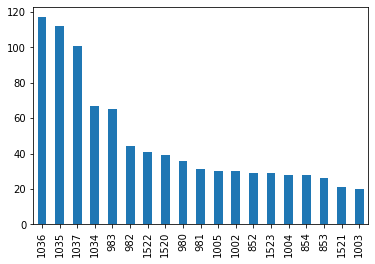

In [87]:
#Gráfico de barras (colunas)
df['LojaID'].value_counts(ascending=False).plot.bar()

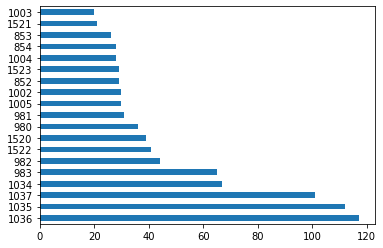

In [88]:
#Gráfico de barra horizontal 
df['LojaID'].value_counts(ascending=False).plot.barh()

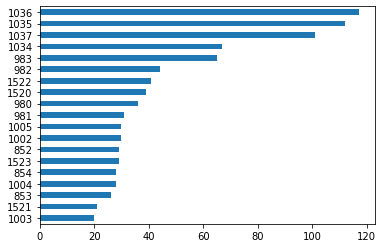

In [90]:
df['LojaID'].value_counts(ascending=True).plot.barh();

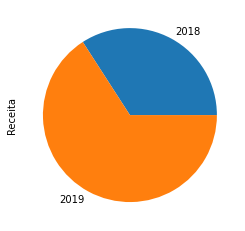

In [91]:
#Gráfico de Pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie();

In [92]:
#Total de Vendas por cidade
total_vendas_cidade = df['Cidade'].value_counts()

In [94]:
total_vendas_cidade

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

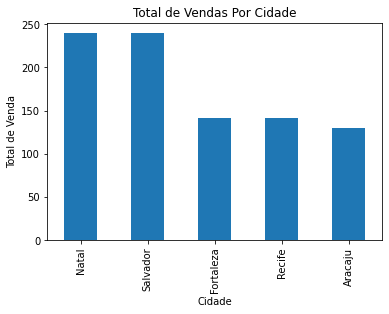

In [93]:
#Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
total_vendas_cidade.plot.bar(title='Total de Vendas Por Cidade')
plt.xlabel('Cidade')
plt.ylabel('Total de Venda');

In [95]:
#Alterando o Estilo
plt.style.use('ggplot')

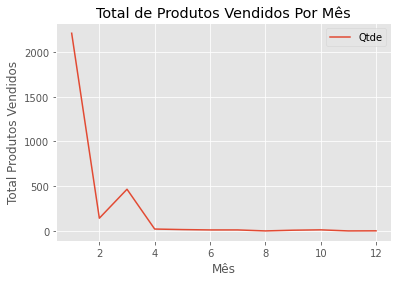

In [100]:
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title='Total de Produtos Vendidos Por Mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [102]:
df.groupby(df['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [117]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

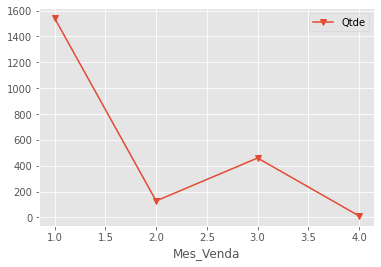

In [125]:
#Total de produtos vendidos por mês em 2019
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker='v')
#plt.xlabel('Mês')
#plt.ylabel('Total Produtos Vendidos')
plt.legend();

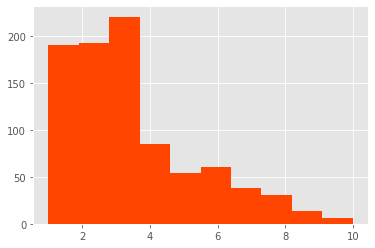

In [129]:
#Histograma
plt.hist(df['Qtde'], color='orangered');

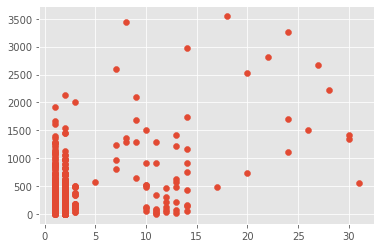

In [131]:
#Gráfico de Dispersão
plt.scatter(x=df_2019['Dia_Venda'], y=df_2019['Receita']);

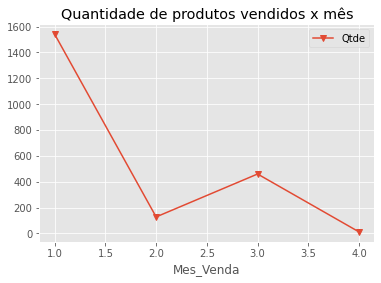

In [136]:
#Salvando em png
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker='v')
plt.title('Quantidade de produtos vendidos x mês')
#plt.xlabel('Mês')
#plt.ylabel('Total de Produtos Vendidos')
plt.legend();
plt.savefig('grafico_QTDExMES.png')